<a href="https://colab.research.google.com/github/relfarizi/Final_Project/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [26]:
# Install rdkit

def install_rdkit():
  !wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
  !chmod +x Miniconda3-latest-Linux-x86_64.sh
  !time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
  !time conda install -q -y -c conda-forge rdkit

# install_rdkit()

In [27]:
# Data

#from google.colab import files
import pandas as pd
import numpy as np
import regex as re

# rdkit
import sys
#sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit import Chem
from rdkit.Chem import DataStructs

# random
import random as rd

## Data

### Pre-Processing Data

In [28]:
def preprocessing_data(link_of_data) :
  dataset = pd.read_csv(link_of_data,sep=";")
  dataset = dataset.iloc[:,[0,7,9,10,11]]

  list_of_column_dataframe = dataset.columns
  list_of_dataset_after = []

  list_of_dataset_before = np.array(dataset)
  
  for data in list_of_dataset_before :
    if data[2] == "'='" :
      if data[4] == "nM" :
        if data[3] < 10000 :
          data[3] = data[3]/1000
          list_of_dataset_after.append(data)
  
  dataframe_of_dataset_after = pd.DataFrame(list_of_dataset_after)
  dataframe_of_dataset_after.columns = list_of_column_dataframe
  name_of_file_download = "Dataset_After.csv"
  dataframe_of_dataset_after.to_csv(name_of_file_download)
  files.download(name_of_file_download)
  return dataframe_of_dataset_after


In [29]:
#preprocessing_data("https://raw.githubusercontent.com/relfarizi/Final_Project/master/Data/Dataset_Before.csv")

### Data After Pre-Processing

In [30]:
# for colab

dataset = pd.read_csv('https://raw.githubusercontent.com/relfarizi/Final_Project/master/Data/Dataset_After.csv', index_col= 0)


#dataset = pd.read_csv('Data/Dataset_After.csv',index_col = 0)
dataset.head(5)

,Molecule ChEMBL ID,Smiles,Standard Relation,Standard Value,Standard Units
0,CHEMBL2263120,CC1(C)CC[C@]2(C(=O)OCCCCCCCCCCC(=O)O)CC[C@]3(C...,'=',0.7200,nM
1,CHEMBL2263121,CC1(C)CC[C@]2(C(=O)NC(Cc3ccccc3)C(=O)O)CC[C@]3...,'=',3.3100,nM
2,CHEMBL168,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',5.0501,nM
3,CHEMBL508831,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',0.5400,nM
4,CHEMBL506556,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',0.6200,nM


In [31]:
#dataset = dataset.drop_duplicates(keep=False,inplace=True)
dataset = dataset.dropna()
mol_smiles = dataset.iloc[:,1].values.tolist()
row_drop = []
for i in range(len(mol_smiles)) :
  #print(mol_smiles[i])
  if len(str(mol_smiles[i])) < 5 :
    row_drop.append(i)
print(row_drop)
dataset.drop(row_drop)
dataset.iloc[258,:]

[]


Molecule ChEMBL ID                                         CHEMBL504726
Smiles                COc1ccc(OC)c([C@@H]2O[C@H](CNC(=O)c3ccccc3)[C@...
Standard Relation                                                   '='
Standard Value                                                     4.13
Standard Units                                                       nM
Name: 258, dtype: object

## Probability Activity

### 1. Molecule Activity
Untuk mencari jumlah dari nilai aktivitas masing2 molekul

variabel yang digunakan :
* mol_name = list nama molekul
* mol_smile = list smile molekul
* mol_act = list berisi nilai IC50
* act = nilai aktivitas tiap molekul
* sum_act = Nilai jumlah dari a

In [32]:
mol_name = dataset.iloc[:,0].values.tolist()
mol_smiles = dataset.iloc[:,1].values.tolist()
mol_act = dataset.iloc[:,3].values.tolist()
sum_act = 0
for molekul in mol_act :
  act = np.exp(-molekul)
  sum_act  += act
print(sum_act)

616.3006027743246


### 2. Probability Succes


Mencari nilai probabilitas kesuksesan untuk setiap molekul

Variabel yang digunakan :
* n = banyaknya molekul
* mol_act_dict = Dictioary yang akan menampung nilai activity dan probabilitas
>* mol_act_dict[keys][0] = IC50(dari data)
>* mol_act_dict[keys][1] = Aktifitas Molekul (dari rumus)
>* mol_act_dict[keys][2] = Probabilitas Kesuksesan
* act = nilai aktivitas molekul
* prob = nilai probabilitas kesuksesan molekul
* sum_pro = nilai jumlah dari Probabiliras Kesuksesan




In [33]:
n = len(mol_act)
#p_avg = 1/n
mol_prob = []

# act = probabilitas kesuksesan

sum_pro = 0
for molekul in mol_act :
  #act = (molekul[1]*p_avg*n)/sum_act
  act = np.exp(-molekul)
  prob = act/sum_act
  prob = round(prob,8)
  mol_prob.append(prob)
  sum_pro += prob
print(sum_pro)


0.9999999799999977


## Cost

In [264]:
sum_of_cost = 500000
mol_cost = []
sum_cost = 0
for mol in mol_prob:
    cost = mol*sum_of_cost
    mol_cost.append(round(cost,4))
    sum_cost += cost
print(sum_cost)

499999.99000000075


## Fingerprint

In [200]:
mol_fp = []
i = 0
print(mol_smiles[258])
for molekul in mol_smiles :
  smiles = Chem.MolFromSmiles(str(molekul))
  fp = Chem.RDKFingerprint(smiles)
  #print(i)
  i+= 1
  mol_fp.append(fp)
print((mol_fp))

COc1ccc(OC)c([C@@H]2O[C@H](CNC(=O)c3ccccc3)[C@@H](O)[C@H](OC(=O)c3ccccc3)[C@H]2OC(=O)c2ccccc2)c1
[<rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001F420979F80>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001F422ABE760>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001F4229D9120>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001F422ABE850>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001F422ABE620>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001F422ABE3F0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001F422A923F0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001F4229D9260>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001F422A926C0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001F422A92CB0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x000001F422A92940>, <rdkit.DataStructs.cDataStructs.E

## To DataFrame

In [273]:
#df_mol = pd.DataFrame.from_dict(mol_act_dict, orient='index')
#df_mol.columns = ["IC50","Molecule Activity", "Probability Activity"]
#df_mol.sort_values(by=["IC50"], ascending=False)
#mol_name = pd.Series(mol_name)
#mol_act = pd.Series(mol_act)
#df_mol = pd.concat(mol_name,mol_act)
#print(len(mol_name))
#print(len(mol_smiles))
#print(len(mol_fp))
#print(len(mol_act))
#print(len(mol_prob))

df = pd.DataFrame({'mol_name':mol_name,
                       'mol_smiles' : mol_smiles,
                       'mol_act':mol_act,
                       'mol_fp' : mol_fp,
                       'mol_prob' : mol_prob,
                       'mol_cost' : mol_cost
                       })

df.head()

,mol_name,mol_smiles,mol_act,mol_fp,mol_prob,mol_cost
0,CHEMBL2263120,CC1(C)CC[C@]2(C(=O)OCCCCCCCCCCC(=O)O)CC[C@]3(C...,0.7200,"[0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...",0.000790,394.900
1,CHEMBL2263121,CC1(C)CC[C@]2(C(=O)NC(Cc3ccccc3)C(=O)O)CC[C@]3...,3.3100,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, ...",0.000059,29.625
2,CHEMBL168,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,5.0501,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...",0.000010,5.200
3,CHEMBL508831,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,0.5400,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...",0.000946,472.780
4,CHEMBL506556,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,0.6200,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, ...",0.000873,436.430


In [275]:
df_mol = df.iloc[:,[0,2,3,5]]
df_mol

,mol_name,mol_act,mol_fp,mol_cost
0,CHEMBL2263120,0.7200,"[0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...",394.900
1,CHEMBL2263121,3.3100,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, ...",29.625
2,CHEMBL168,5.0501,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...",5.200
3,CHEMBL508831,0.5400,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...",472.780
4,CHEMBL506556,0.6200,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, ...",436.430
...,...,...,...,...
1847,CHEMBL1782241,5.2000,"[0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, ...",4.475
1848,CHEMBL323197,5.5000,"[1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, ...",3.315
1849,CHEMBL4071698,0.7200,"[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...",394.900
1850,CHEMBL3770020,1.5800,"[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...",167.105


## Individu

In [490]:
n_subset = 5

def individu(subset):
    #subset = np.array(subset.values.tolist())
    mol_name = subset.iloc[:,0].values
    mol_act = subset.iloc[:,1].values
    mol_fp = subset.iloc[:,2].values
    #print(mol_name)
    #print(mol_act)
    #print(mol_fp[1])

    
    fp_list = []
    n = len(subset)
    
    for i in range(n):
        for j in range(n):
            if i > j :
                tmp_fp = DataStructs.FingerprintSimilarity(mol_fp[i],mol_fp[j])
                fp_list.append(tmp_fp)
                
    avg_act = np.mean(mol_act)
    avg_div = np.mean(fp_list)
    if [mol_name,avg_act,avg_div] is not None :
        return [mol_name,avg_act,avg_div]
    else :
        return []



In [491]:
def is_budget_enough(subset,budget):
    subset =  subset.iloc[:,3].values
    sum_of_subset = sum(subset)
    if sum_of_subset <= budget :
        check = True
    else :
        check = False
    return [check,sum_of_subset]

### NSGA-II

In [535]:
# Initialization of Individu
budget = 50
n_subset = 20

def initialization_individu(df_mol,budget,n_subset) :
    i = 0
    iteration = 100
    calon_individu = df_mol.sample(n_subset)

    while(not is_budget_enough(calon_individu,budget)[0]) and i < iteration :
        calon_individu = df_mol.sample(n_subset)
        i+=1
    if is_budget_enough(calon_individu,budget)[0]:
        return individu(calon_individu)
    else :
        return []

        
        

In [545]:
if initialization_individu(df_mol,budget,n_subset) != [] :
    print(initialization_individu(df_mol,budget,n_subset))
else :
    print("can't continue")

can't continue


### Try Pymoo

In [126]:
from pymoo.algorithms.nsga2 import NSGA2
from pymoo.factory import get_problem, get_sampling, get_crossover, get_mutation
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt5")

print(problem)

algorithm = NSGA2(pop_size=100,
                  sampling=get_sampling("bin_random"),
                  crossover=get_crossover("bin_two_point"),
                  mutation=get_mutation("bin_bitflip"),
                  eliminate_duplicates=True)

res = minimize(problem,
               algorithm,
               ('n_gen', 500),
               seed=1,
               verbose=True)

print(res)


# name: ZDT5
# n_var: 80
# n_obj: 2
# n_constr: 0
# f(xl): 0.0
# f((xl+xu)/2): 0.5
# f(xu): 1.0

n_gen | n_eval  | igd          | gd           | hv          
1     | 100     | 0.1981738547 | 0.2127077043 | 0.5424082282
2     | 200     | 0.1860100825 | 0.1994088073 | 0.5844257089
3     | 300     | 0.1774705251 | 0.1911462896 | 0.6232890316
4     | 400     | 0.1686137153 | 0.1796926695 | 0.6290959324
5     | 500     | 0.1578372150 | 0.1726762265 | 0.6394368697
6     | 600     | 0.1522710300 | 0.1605779868 | 0.6503282111
7     | 700     | 0.1424436499 | 0.1477885871 | 0.6625402572
8     | 800     | 0.1349524167 | 0.1515656166 | 0.6804047034
9     | 900     | 0.1343595497 | 0.1426456849 | 0.6868439010
10    | 1000    | 0.1262860199 | 0.1364461732 | 0.6941763696
11    | 1100    | 0.1203118287 | 0.1292162278 | 0.7056421133
12    | 1200    | 0.1188729709 | 0.1261464746 | 0.7087558108
13    | 1300    | 0.1160568064 | 0.1259832200 | 0.7130121158
14    | 1400    | 0.1133573618 | 0.1155020016 | 0

134   | 13400   | 0.0360012882 | 0.0346550914 | 0.8544085261
135   | 13500   | 0.0360012882 | 0.0336820560 | 0.8544085261
136   | 13600   | 0.0360012882 | 0.0335743482 | 0.8544085261
137   | 13700   | 0.0360012882 | 0.0335303148 | 0.8544085261
138   | 13800   | 0.0360012882 | 0.0343819278 | 0.8544085261
139   | 13900   | 0.0360012882 | 0.0345895680 | 0.8544085261
140   | 14000   | 0.0360012882 | 0.0342435418 | 0.8544085261
141   | 14100   | 0.0360012882 | 0.0333980010 | 0.8544085261
142   | 14200   | 0.0360012882 | 0.0330689083 | 0.8544085261
143   | 14300   | 0.0360012882 | 0.0341870089 | 0.8544085261
144   | 14400   | 0.0360012882 | 0.0355391987 | 0.8544085261
145   | 14500   | 0.0360012882 | 0.0356307743 | 0.8544085261
146   | 14600   | 0.0360012882 | 0.0354343675 | 0.8544085261
147   | 14700   | 0.0360012882 | 0.0347801614 | 0.8544085261
148   | 14800   | 0.0360012882 | 0.0340613026 | 0.8544085261
149   | 14900   | 0.0360012882 | 0.0330071520 | 0.8544085261
150   | 15000   | 0.0360

271   | 27100   | 0.0346606260 | 0.0329174237 | 0.8544639539
272   | 27200   | 0.0346606260 | 0.0335951856 | 0.8544639539
273   | 27300   | 0.0346606260 | 0.0345896485 | 0.8544639539
274   | 27400   | 0.0346606260 | 0.0340073851 | 0.8544639539
275   | 27500   | 0.0346606260 | 0.0338612438 | 0.8544639539
276   | 27600   | 0.0346606260 | 0.0328908414 | 0.8544639539
277   | 27700   | 0.0346606260 | 0.0321234868 | 0.8544639539
278   | 27800   | 0.0346606260 | 0.0326986129 | 0.8544639539
279   | 27900   | 0.0346606260 | 0.0331050021 | 0.8544639539
280   | 28000   | 0.0346606260 | 0.0327453604 | 0.8544639539
281   | 28100   | 0.0346606260 | 0.0327548336 | 0.8544639539
282   | 28200   | 0.0346606260 | 0.0320901113 | 0.8544639539
283   | 28300   | 0.0346606260 | 0.0320206006 | 0.8544639539
284   | 28400   | 0.0346606260 | 0.0322713590 | 0.8544639539
285   | 28500   | 0.0346606260 | 0.0327423656 | 0.8544639539
286   | 28600   | 0.0346606260 | 0.0325103952 | 0.8544639539
287   | 28700   | 0.0346

411   | 41100   | 0.0343193723 | 0.0346029997 | 0.8544639539
412   | 41200   | 0.0343193723 | 0.0347963173 | 0.8544639539
413   | 41300   | 0.0343193723 | 0.0337437464 | 0.8544639539
414   | 41400   | 0.0343193723 | 0.0344002866 | 0.8544639539
415   | 41500   | 0.0343193723 | 0.0339239505 | 0.8544639539
416   | 41600   | 0.0343193723 | 0.0348923455 | 0.8544639539
417   | 41700   | 0.0343193723 | 0.0348154048 | 0.8544639539
418   | 41800   | 0.0343193723 | 0.0335859037 | 0.8544639539
419   | 41900   | 0.0343193723 | 0.0338228967 | 0.8544639539
420   | 42000   | 0.0343193723 | 0.0328124601 | 0.8544639539
421   | 42100   | 0.0343193723 | 0.0321219674 | 0.8544639539
422   | 42200   | 0.0343193723 | 0.0326268859 | 0.8544639539
423   | 42300   | 0.0343193723 | 0.0326409505 | 0.8544639539
424   | 42400   | 0.0343193723 | 0.0321525100 | 0.8544639539
425   | 42500   | 0.0343193723 | 0.0324567789 | 0.8544639539
426   | 42600   | 0.0343193723 | 0.0322338600 | 0.8544639539
427   | 42700   | 0.0343

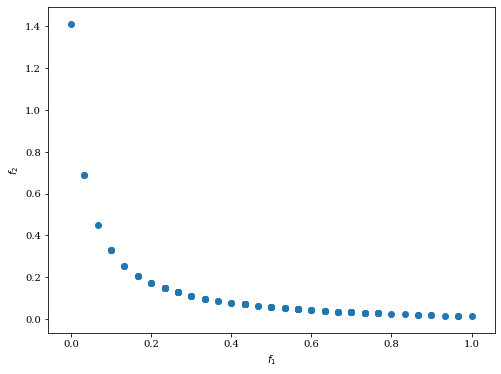

In [124]:
Scatter().add(res.F).show()

## For git (Can't be use yet)

file > save a copy in Github

In [39]:
#!git init

#!git config --global user.name “relfarizi”

#!git remote add origin https://github.com/relfarizi/Final_Project.git

#!git add .

#!git commit -m "Probability Activity"

#!git push

#!git status

### lampau

In [119]:
subset_row = []
sum_of_subset = 10

for i in range(sum_of_subset):
    random = rd.randint(0,len(df_mol))
    while random in subset_row:
        random = rd.randint(0,len(df_mol))
    subset_row.append(random)
    
print(subset_row)
calon_individu = df_mol.iloc[subset_row,:].values.tolist()
calon_individu

individu(calon_individu)

[778, 1628, 308, 1274, 1211, 1791, 78, 1319, 271, 1679]
['CHEMBL210837' 'CHEMBL3634591' 'CHEMBL168' 'CHEMBL3310445' 'CHEMBL169'
 'CHEMBL168' 'CHEMBL446073' 'CHEMBL3220071' 'CHEMBL2424688'
 'CHEMBL2263121']
[0.12 0.34600000000000003 5.6 6.6 3.08 2.0580000000000003 5.97 7.47 2.1
 3.31]


[array(['CHEMBL210837', 'CHEMBL3634591', 'CHEMBL168', 'CHEMBL3310445',
        'CHEMBL169', 'CHEMBL168', 'CHEMBL446073', 'CHEMBL3220071',
        'CHEMBL2424688', 'CHEMBL2263121'], dtype=object),
 3.6654000000000004,
 0.34009295948582474]

In [157]:
# Inisialisasi Individu

def initialization_individu() :
    for i in range(sum_of_subset):
        random = rd.randint(0,len(df_mol))
        while random in subset_row:
            random = rd.randint(0,len(df_mol))
        subset_row.append(random)
#subset_row = rd.sample(df_mol.values,10)
df
list_subset = []
for i in (df_mol).index :
    if i in subset_row:
        is_subset = 1
    else :
        is_subset = 0
    list_subset.append(is_subset)
print(list_subset)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 